In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import parse_trajectory

In [5]:
file_path = "../test/traj.out"
traj_df = parse_trajectory(file_path)

In [6]:
traj_df.head()

,timestep,id,type,x,y,z,vx,vy,vz
0,0,1.0,1.0,0.008451,-0.006223,-0.007456,0.017201,-0.012660,-0.015161
1,0,2.0,1.0,0.001246,2.698436,2.696415,0.002535,0.012068,0.007961
2,0,3.0,1.0,2.700564,-0.006847,2.696724,0.016410,-0.013936,0.008591
3,0,4.0,1.0,2.700849,2.695196,0.001048,0.016993,0.005479,0.002138
4,0,5.0,1.0,-0.006636,0.006280,5.392062,-0.013509,0.012782,0.014375


Momentum changes between timesteps:
                     vx            vy            vz
timestep                                          
100      -2.081668e-15  2.775558e-17 -1.776357e-15
200       6.245005e-16  3.469447e-16 -2.747802e-15
300       1.252470e-15 -9.853229e-16  2.081668e-15
400      -1.307982e-15  2.220446e-16  5.551115e-16
500       1.179612e-15  3.400058e-16  2.220446e-16
...                ...           ...           ...
9500     -3.469447e-16  1.082467e-15 -7.771561e-16
9600      2.498002e-16 -1.942890e-16  1.290634e-15
9700      9.020562e-16 -4.510281e-16  7.632783e-16
9800     -6.800116e-16 -4.926615e-16 -2.248202e-15
9900     -1.013079e-15 -5.134781e-16  3.191891e-15

[99 rows x 3 columns]
Angular Momentum changes between timesteps:
                 Lx        Ly        Lz
timestep                              
100      -3.420678 -8.579565 -5.071551
200      -1.166192 -4.643849 -4.938374
300       6.182460  2.326339  0.462897
400      -7.001038 -3.042434  2.46118

/tmp/ipykernel_84852/87268849.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_angular_momentum = grouped.apply(angular_momentum)


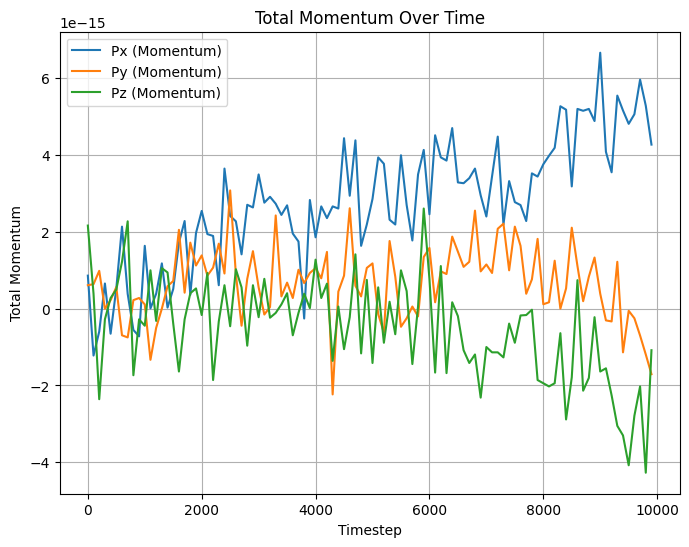

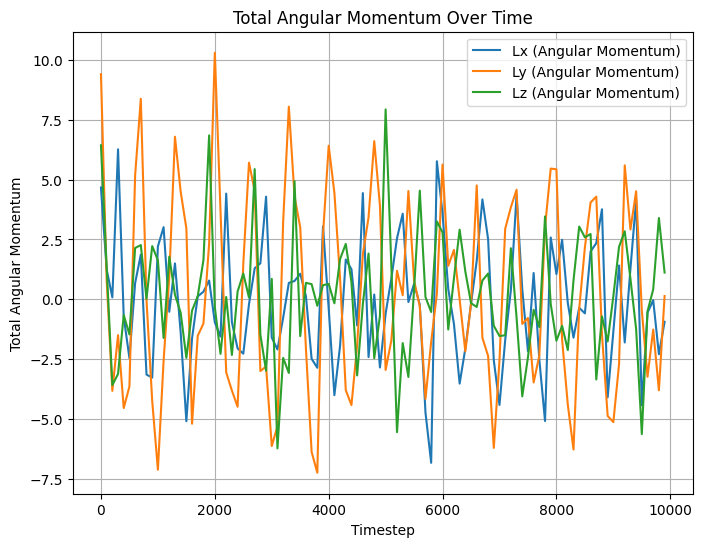

momentum change max: 4.010680676458378e-15
angular momentum change max: 12.591316347825899
momentum change rate: vx     46.31
vy    120.50
vz     93.83
dtype: float64%
angular momentum change rate: Lx    184.39
Ly     96.50
Lz    108.90
dtype: float64%
Momentum is conserved.
Angular Momentum is not conserved.


In [ ]:
# Assign a uniform mass to all particles (you can replace this if masses differ)
particle_mass = 1.0  # Assuming all particles have a mass of 1 unit


# Step 1: Calculate total momentum at each timestep
def calculate_total_momentum(df):
    grouped = df.groupby("timestep")
    total_momentum = grouped[["vx", "vy", "vz"]].apply(
        lambda g: (g * particle_mass).sum()
    )
    return total_momentum


# Step 2: Calculate total angular momentum at each timestep
def calculate_total_angular_momentum(df):
    def angular_momentum(group):
        positions = group[["x", "y", "z"]].values
        velocities = group[["vx", "vy", "vz"]].values
        angular_momentum = np.cross(positions, velocities * particle_mass)
        return angular_momentum.sum(axis=0)

    grouped = df.groupby("timestep")
    total_angular_momentum = grouped.apply(angular_momentum)
    return pd.DataFrame(
        total_angular_momentum.tolist(),
        index=total_angular_momentum.index,
        columns=["Lx", "Ly", "Lz"],
    )


# Step 3: Analyze and verify conservation
# Total Momentum
total_momentum = calculate_total_momentum(traj_df)
momentum_change = total_momentum.diff().dropna()
print("Momentum changes between timesteps:\n", momentum_change)

# Total Angular Momentum
total_angular_momentum = calculate_total_angular_momentum(traj_df)
angular_momentum_change = total_angular_momentum.diff().dropna()
print("Angular Momentum changes between timesteps:\n", angular_momentum_change)

# Step 4: Plot results to visualize conservation
# Plot Momentum
plt.figure(figsize=(8, 6))
plt.plot(total_momentum.index, total_momentum["vx"], label="Px (Momentum)")
plt.plot(total_momentum.index, total_momentum["vy"], label="Py (Momentum)")
plt.plot(total_momentum.index, total_momentum["vz"], label="Pz (Momentum)")
plt.xlabel("Timestep")
plt.ylabel("Total Momentum")
plt.title("Total Momentum Over Time")
plt.legend()
plt.grid()
plt.savefig("Total_Momentum.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot Angular Momentum
plt.figure(figsize=(8, 6))
plt.plot(
    total_angular_momentum.index,
    total_angular_momentum["Lx"],
    label="Lx (Angular Momentum)",
)
plt.plot(
    total_angular_momentum.index,
    total_angular_momentum["Ly"],
    label="Ly (Angular Momentum)",
)
plt.plot(
    total_angular_momentum.index,
    total_angular_momentum["Lz"],
    label="Lz (Angular Momentum)",
)
plt.xlabel("Timestep")
plt.ylabel("Total Angular Momentum")
plt.title("Total Angular Momentum Over Time")
plt.legend()
plt.grid()
plt.savefig("Total_Angular_Momentum.png", dpi=300, bbox_inches="tight")
plt.show()

# Conservation Check
# Tolerance for numerical errors
momentum_conserved = momentum_change.abs().max().max() < 1e-5
angular_momentum_conserved = angular_momentum_change.abs().max().max() < 1e-5

print(f"momentum change max: {momentum_change.abs().max().max()}")
print(f"angular momentum change max: {angular_momentum_change.abs().max().max()}")

# relative change rate??
# momentum_change_rate = (
#     (momentum_change.abs().max() / total_momentum.abs().max()) * 100
# ).round(2)
# angular_momentum_change_rate = (
#     (angular_momentum_change.abs().max() / total_angular_momentum.abs().max()) * 100
# ).round(2)

# print(f"momentum change rate: {momentum_change_rate}%")
# print(f"angular momentum change rate: {angular_momentum_change_rate}%")

if momentum_conserved:
    print("Momentum is conserved.")
else:
    print("Momentum is not conserved.")

if angular_momentum_conserved:
    print("Angular Momentum is conserved.")
else:
    print("Angular Momentum is not conserved.")

In [11]:
momentum_change

,vx,vy,vz
timestep,,,
100,-2.081668e-15,2.775558e-17,-1.776357e-15
200,6.245005e-16,3.469447e-16,-2.747802e-15
300,1.252470e-15,-9.853229e-16,2.081668e-15
400,-1.307982e-15,2.220446e-16,5.551115e-16
500,1.179612e-15,3.400058e-16,2.220446e-16
...,...,...,...
9500,-3.469447e-16,1.082467e-15,-7.771561e-16
9600,2.498002e-16,-1.942890e-16,1.290634e-15
9700,9.020562e-16,-4.510281e-16,7.632783e-16
